In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.00,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.00,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.00,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.00,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.00,0.000,19.0000,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,30692,397.0,1.0,48.0,6.0,4.0,1.0,1999-00,5.0,24.0,0.0,Center(C),NaN,Less Than 8 ft.,Manchester United,2000-06-19,MANU vs. IND,NaN,"42.982923, -71.446094",shot - 1,NaN,49900088,1610612747,17.20,4.00,1.000,5.0000,24.0
30693,30693,398.0,0.0,0.0,6.0,4.0,1.0,1999-00,5.0,20.0,NaN,Center(C),Goal Area,Less Than 8 ft.,Manchester United,2000-06-19,MANU vs. IND,30694.0,"42.982923, -71.446094",shot - 49,NaN,49900088,1610612747,6.00,64.36,1.000,5.0000,20.0
30694,30694,426.0,-134.0,166.0,3.0,4.0,1.0,1999-00,28.0,41.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-06-19,MANU vs. IND,30695.0,NaN,NaN,shot - 3,49900088,1610612747,3.00,4.00,1.000,28.0000,41.0
30695,30695,448.0,31.0,267.0,2.0,4.0,1.0,1999-00,10.0,46.0,0.0,Center(C),Penalty Spot,NaN,Manchester United,2000-06-19,MANU vs. IND,30696.0,"42.982923, -71.446094",shot - 26,NaN,49900088,1610612747,2.00,112.36,1.000,10.0000,46.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
Unnamed: 0,0.000000
match_event_id,5.091703
location_x,4.759423
location_y,5.016777
remaining_min,5.088445
power_of_shot,4.840864
knockout_match,4.941851
game_season,19.096329
remaining_sec,5.192690
distance_of_shot,5.104733


In [6]:
df['team_name'].value_counts()

Manchester United    29162
Name: team_name, dtype: int64

In [7]:
df['match_id'].value_counts()

21501228    50
20200069    47
20500591    46
20600431    45
20700553    44
            ..
29600284     1
29700933     1
29600027     1
29600813     1
29600412     1
Name: match_id, Length: 1559, dtype: int64

In [8]:
#Drop irrelevant columns and columns having more than 50% missing values
dropcols = ["Unnamed: 0", "match_event_id", "team_name", "match_id", "team_id", "date_of_game","type_of_shot", "type_of_combined_shot", "remaining_min.1", "power_of_shot.1", "knockout_match.1", "remaining_sec.1", "distance_of_shot.1"  ]
df = df.drop(dropcols, axis=1)

In [9]:
#Removing Null values from 'home/away'
df['home/away'] = df['home/away'].fillna(method='ffill')

In [10]:
#Home:1; Away:0

def find(word):
    if ('vs') in word:
        return 0
    else:
        return 1
df['home/away'] = df['home/away'].apply(lambda x :find(x))
df = pd.get_dummies(df, columns=["home/away"])

In [11]:
df['shot_basics'].value_counts()

Mid Range          11955
Goal Area           6787
Penalty Spot        5321
Goal Line           4357
Right Corner         367
Left Corner          268
Mid Ground Line       67
Name: shot_basics, dtype: int64

<IPython.core.display.Javascript object>


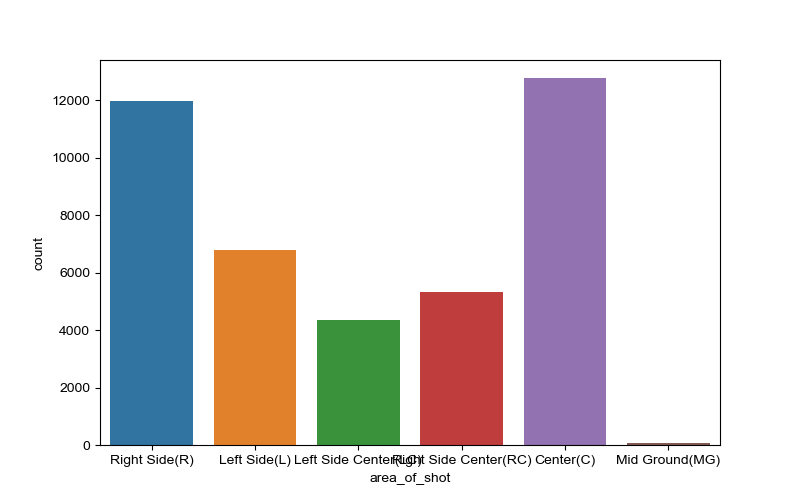

In [12]:
df['shot_basics'] = df['shot_basics'].fillna('Not Known')
def process_shot_basics(x):
    if(x in ["Mid Range", "Goal Area", "Penalty Spot", "Goal Line"]):
        return x
    return "Others"

df['shot_basics'] = df['shot_basics'].apply(lambda x : process_shot_basics(x))
plt.figure(figsize=(8,5))
sns.countplot(df['shot_basics'])
df = pd.get_dummies(df, columns=["shot_basics"])

In [13]:
df['area_of_shot'].value_counts()

Center(C)                12761
Right Side Center(RC)     4562
Right Side(R)             4370
Left Side Center(LC)      3848
Left Side(L)              3573
Mid Ground(MG)              81
Name: area_of_shot, dtype: int64

In [14]:
sns.countplot(df['area_of_shot'])
df = pd.get_dummies(df, columns=["area_of_shot"])

In [15]:
df['game_season'].value_counts()

2005-06    1911
2002-03    1823
2008-09    1810
2007-08    1733
2009-10    1665
2001-02    1632
2006-07    1537
2000-01    1488
2010-11    1462
2003-04    1329
2011-12    1326
2012-13    1296
1999-00    1264
2004-05    1074
2015-16     893
1997-98     804
1998-99     752
2014-15     594
1996-97     381
2013-14      61
Name: game_season, dtype: int64

<IPython.core.display.Javascript object>


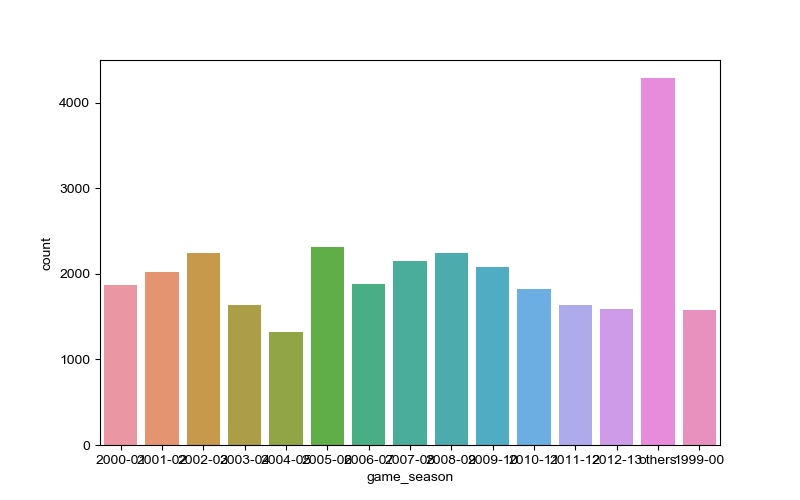

In [16]:
df['game_season'] = df['game_season'].fillna(method= 'ffill')
def process_game_season(x):
    if(x in ["2015-16", "1997-98", "1998-99", "2014-15","1996-97", "2013-14"]):
        return "others"
    return x

df['game_season'] = df['game_season'].apply(lambda x : process_game_season(x))
plt.figure(figsize=(8,5))
sns.countplot(df['game_season'])
df = pd.get_dummies(df, columns=["game_season"])

In [17]:
df['range_of_shot'].value_counts()

Less Than 8 ft.    8933
16-24 ft.          7892
8-16 ft.           6290
24+ ft.            5937
Back Court Shot      81
Name: range_of_shot, dtype: int64

<IPython.core.display.Javascript object>


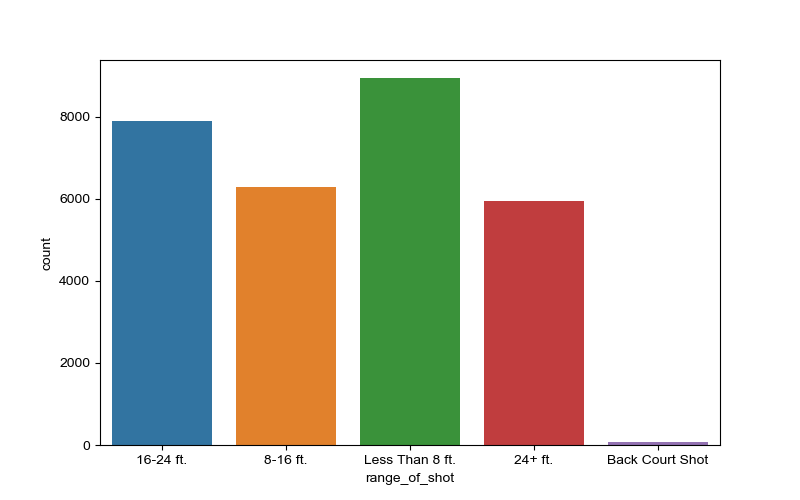

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(df['range_of_shot'])
df = pd.get_dummies(df, columns=["range_of_shot"])

<IPython.core.display.Javascript object>


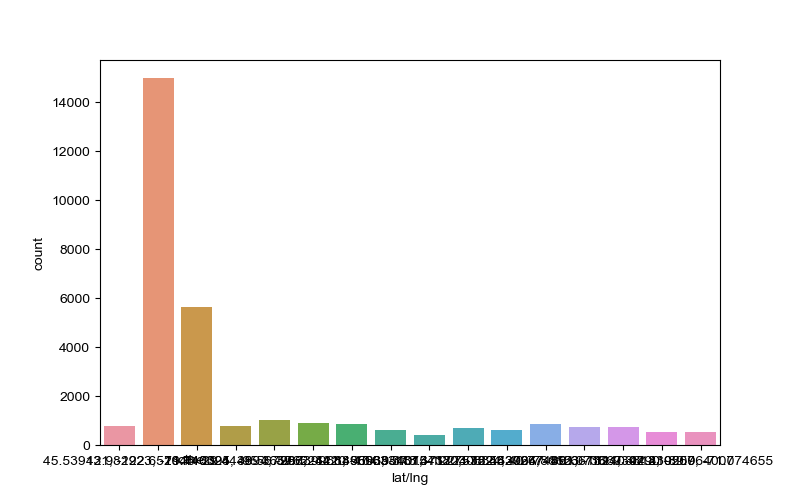

In [19]:
df['lat/lng'].value_counts()
df['lat/lng'] = df['lat/lng'].fillna(method= 'ffill')
def process_lat_lng(x):
    if(x in ['28.549237, -81.372780','39.993941, -75.143458', "42.379455, -83.115635","40.361408, -86.186052", 
             "43.717098, -79.395917", "40.708999, -73.872430", "41.484971, -81.671552" ,"38.919619, -77.015211",
             "35.492151, -97.519011", "41.845137, -87.660450", "33.768092, -84.393817", "25.790710, -80.207819" , 
             "30.018061, -90.022651" , "43.062206, -87.944754", "40.643505, -73.939507", "35.262047, -80.865746", 
             "30.028164, -89.997933", "49.250068, -123.114646", "30.055498, -89.960838" , "35.205878, -80.841194",
             "40.623199, -73.951223", "33.513157, -112.082793", "40.324211, -111.674849"]):
        return "others"
    return x

df['lat/lng'] = df['lat/lng'].apply(lambda x : process_lat_lng(x))
plt.figure(figsize=(8,5))
sns.countplot(df['lat/lng'])
df = pd.get_dummies(df, columns=['lat/lng'])

In [20]:
df['knockout_match'].value_counts()

0.0    24921
1.0     4259
Name: knockout_match, dtype: int64

<IPython.core.display.Javascript object>


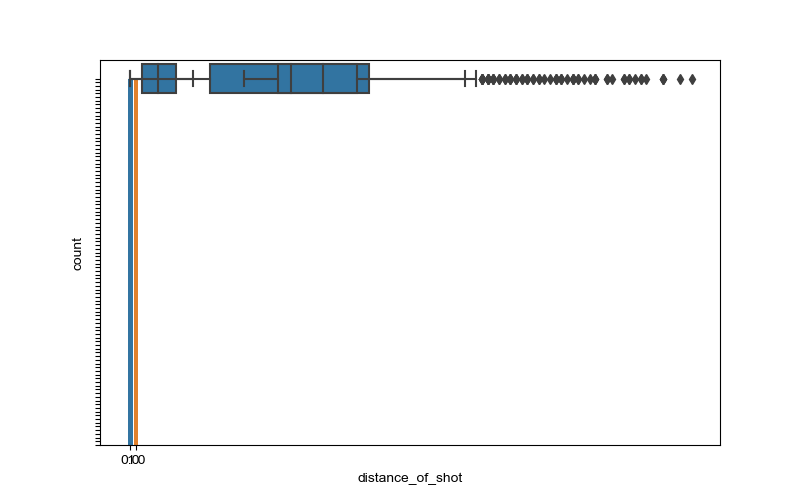

In [21]:
df['knockout_match'] = df['knockout_match'].fillna(df['knockout_match'].mode()[0])

plt.figure(figsize=(8,5))
sns.countplot(df['knockout_match'])
df = pd.get_dummies(df, columns=["knockout_match"])

In [22]:
df['power_of_shot'].value_counts()

3.0    7885
1.0    7659
4.0    6910
2.0    6399
5.0     314
6.0      37
7.0       7
Name: power_of_shot, dtype: int64

In [23]:
df['power_of_shot'] = df['power_of_shot'].fillna(method= 'ffill')
def process_power_of_shot(x):
    if(x in [5.0, 6.0, 7.0]):
        return "others"
    return x

df['power_of_shot'] = df['power_of_shot'].apply(lambda x : process_power_of_shot(x))
df = pd.get_dummies(df, columns=["power_of_shot"])

In [24]:
df.isnull().sum()
df['Pos-x'] = np.cos(df['location_x']) * np.cos(df['location_y'])
df['Pos-y'] = np.cos(df['location_x']) * np.sin(df['location_y'])
df['Pos-z'] = np.sin(df['location_x'])

df['Pos-x'] = df['Pos-x'].fillna('-1')
df['Pos-y'] = df['Pos-y'].fillna('-1')
df['Pos-z'] = df['Pos-z'].fillna('-1')

del df['location_x']
del df['location_y']

In [25]:
#Filling NaN values in "shot_id_number"
for i in range(1, (len(df['shot_id_number'])-1)):
    if (math.isnan(df['shot_id_number'][i])):
        df['shot_id_number'][i] = ((df['shot_id_number'][i-1]) + 1 )
        

In [26]:
df

,remaining_min,remaining_sec,distance_of_shot,is_goal,shot_id_number,home/away_0,home/away_1,shot_basics_Goal Area,shot_basics_Goal Line,shot_basics_Mid Range,shot_basics_Others,shot_basics_Penalty Spot,area_of_shot_Center(C),area_of_shot_Left Side Center(LC),area_of_shot_Left Side(L),area_of_shot_Mid Ground(MG),area_of_shot_Right Side Center(RC),area_of_shot_Right Side(R),game_season_1999-00,game_season_2000-01,game_season_2001-02,game_season_2002-03,game_season_2003-04,game_season_2004-05,game_season_2005-06,game_season_2006-07,game_season_2007-08,game_season_2008-09,game_season_2009-10,game_season_2010-11,game_season_2011-12,game_season_2012-13,game_season_others,range_of_shot_16-24 ft.,range_of_shot_24+ ft.,range_of_shot_8-16 ft.,range_of_shot_Back Court Shot,range_of_shot_Less Than 8 ft.,"lat/lng_29.444994, -98.524120","lat/lng_29.740325, -95.365762","lat/lng_32.757824, -96.786653","lat/lng_33.552026, -112.071667","lat/lng_34.189593, -118.471724","lat/lng_35.103812, -89.964007","lat/lng_37.754130, -122.437947","lat/lng_38.567296, -121.456638","lat/lng_39.739968, -104.954013","lat/lng_40.774891, -111.930790","lat/lng_42.330507, -71.074655","lat/lng_42.982923, -71.446094","lat/lng_45.539131, -122.651648","lat/lng_46.667324, -94.419250","lat/lng_47.633181, -122.308343",lat/lng_others,knockout_match_0.0,knockout_match_1.0,power_of_shot_1.0,power_of_shot_2.0,power_of_shot_3.0,power_of_shot_4.0,power_of_shot_others,Pos-x,Pos-y,Pos-z
0,10.0,27.0,38.0,NaN,1.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0.850879,-0.223286,-0.47555
1,10.0,22.0,35.0,0.0,2.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0.996831,0,0.0795485
2,7.0,45.0,36.0,1.0,3.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,-0.888515,0.0788253,-0.452026
3,6.0,52.0,42.0,0.0,4.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0.582713,-0.780024,-0.228052
4,NaN,19.0,20.0,1.0,5.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,6.0,5.0,24.0,0.0,30693.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,-0.345871,-0.41509,0.841471
30693,6.0,5.0,20.0,NaN,30694.0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
30694,3.0,28.0,41.0,1.0,30695.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.406063,-0.224165,-0.885925
30695,2.0,10.0,46.0,0.0,30696.0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,-0.91417,0.0323528,-0.404038


In [27]:
#Filling NaN Values

df['remaining_min'] = df['remaining_min'].fillna(df['remaining_min'].mean())                                                       
df['distance_of_shot'] = df['distance_of_shot'].fillna(df['distance_of_shot'].mean())    
df['remaining_sec'] = df['remaining_sec'].fillna(df['remaining_sec'].mean()) 



In [28]:
# Correlation Matrix

corr_matrix = df.corr()
corr_matrix

,remaining_min,remaining_sec,distance_of_shot,is_goal,shot_id_number,home/away_0,home/away_1,shot_basics_Goal Area,shot_basics_Goal Line,shot_basics_Mid Range,shot_basics_Others,shot_basics_Penalty Spot,area_of_shot_Center(C),area_of_shot_Left Side Center(LC),area_of_shot_Left Side(L),area_of_shot_Mid Ground(MG),area_of_shot_Right Side Center(RC),area_of_shot_Right Side(R),game_season_1999-00,game_season_2000-01,game_season_2001-02,game_season_2002-03,game_season_2003-04,game_season_2004-05,game_season_2005-06,game_season_2006-07,game_season_2007-08,game_season_2008-09,game_season_2009-10,game_season_2010-11,game_season_2011-12,game_season_2012-13,game_season_others,range_of_shot_16-24 ft.,range_of_shot_24+ ft.,range_of_shot_8-16 ft.,range_of_shot_Back Court Shot,range_of_shot_Less Than 8 ft.,"lat/lng_29.444994, -98.524120","lat/lng_29.740325, -95.365762","lat/lng_32.757824, -96.786653","lat/lng_33.552026, -112.071667","lat/lng_34.189593, -118.471724","lat/lng_35.103812, -89.964007","lat/lng_37.754130, -122.437947","lat/lng_38.567296, -121.456638","lat/lng_39.739968, -104.954013","lat/lng_40.774891, -111.930790","lat/lng_42.330507, -71.074655","lat/lng_42.982923, -71.446094","lat/lng_45.539131, -122.651648","lat/lng_46.667324, -94.419250","lat/lng_47.633181, -122.308343",lat/lng_others,knockout_match_0.0,knockout_match_1.0,power_of_shot_1.0,power_of_shot_2.0,power_of_shot_3.0,power_of_shot_4.0,power_of_shot_others
remaining_min,1.000000,0.025303,-0.055592,0.027609,-0.004826,0.006462,-0.006462,-0.006135,0.015702,0.082661,-0.020345,-0.100148,-0.007209,-0.018408,0.027377,-0.071533,-0.009343,0.023557,0.013427,0.011006,-0.005655,0.021167,0.022497,0.013599,-0.009488,0.000356,0.010401,-0.014617,0.003551,-0.015181,-0.030712,-0.029064,0.006050,0.067314,-0.103619,0.039279,-0.071533,-0.001613,0.009410,-0.004907,-0.009896,-0.007818,0.007262,-0.003428,-0.002010,-0.007312,-0.004009,-0.011211,-0.004112,0.007649,-0.002752,0.002425,0.010342,0.001661,-0.013913,0.013913,0.047876,-0.086687,0.092437,-0.036516,-0.097848
remaining_sec,0.025303,1.000000,-0.047269,0.028214,-0.004662,-0.003220,0.003220,0.011002,0.016355,0.011860,-0.016694,-0.030859,0.007935,-0.007898,0.004680,-0.077474,-0.006952,0.005921,-0.004501,-0.000897,-0.000730,-0.003531,0.002489,0.000103,0.004210,0.014270,-0.002267,0.003337,0.004390,0.005702,-0.006192,-0.011339,-0.004751,0.007405,-0.029852,0.013499,-0.077474,0.018797,0.009759,0.001493,0.004948,-0.002989,-0.000090,0.001333,0.007424,-0.006207,-0.006771,-0.002122,-0.008602,-0.003143,-0.004409,0.002432,0.000277,0.005235,0.001030,-0.001030,0.000594,-0.013149,0.009301,0.005184,-0.010546
distance_of_shot,-0.055592,-0.047269,1.000000,-0.193056,0.014801,-0.038805,0.038805,-0.720728,-0.222906,0.260778,0.118981,0.577324,-0.609322,0.352901,0.057666,0.219636,0.372967,0.065469,-0.034211,-0.034341,-0.052591,0.000080,-0.032565,0.002561,0.036979,0.019050,0.012487,0.009328,0.000643,0.012952,0.021891,0.010744,0.014752,0.312714,0.600997,-0.076638,0.218871,-0.781116,-0.009558,0.000791,-0.000449,0.024574,0.001862,-0.012491,-0.002507,0.001198,0.017514,0.016074,0.015159,-0.038514,0.006278,0.010596,0.007791,0.019299,0.008987,-0.008987,-0.027455,-0.014023,-0.009210,0.050914,0.002956
is_goal,0.027609,0.028214,-0.193056,1.000000,-0.012693,0.017874,-0.017874,0.183455,0.006726,-0.062916,-0.032135,-0.102692,0.134300,-0.061910,-0.038575,-0.046846,-0.052490,-0.039815,0.006916,0.010294,0.006043,-0.003857,-0.004552,-0.003873,0.003747,0.005781,0.012154,0.011102,0.005628,0.000287,-0.012411,0.006059,-0.032154,-0.052552,-0.112323,-0.010455,-0.046493,0.164987,-0.004841,-0.012746,-0.002695,0.004575,0.004321,0.000974,-0.000826,0.005708,0.001100,-0.013848,-0.010811,0.017360,0.005900,-0.002072,0.005076,-0.014649,-0.000344,0.000344,0.022708,0.002528,0.009232,-0.035115,-0.001944
shot_id_number,-0.004826,-0.004662,0.014801,-0.012693,1.000000,-0.011069,0.011069,-0.020150,0.025753,-0.028427,-0.000632,0.035404,0.011568,0.009029,0.003260,-0.003690,-0.006847,-0.018383,0.301495,-0

In [29]:
cols = list(df.columns.values)
cols

['remaining_min',
 'remaining_sec',
 'distance_of_shot',
 'is_goal',
 'shot_id_number',
 'home/away_0',
 'home/away_1',
 'shot_basics_Goal Area',
 'shot_basics_Goal Line',
 'shot_basics_Mid Range',
 'shot_basics_Others',
 'shot_basics_Penalty Spot',
 'area_of_shot_Center(C)',
 'area_of_shot_Left Side Center(LC)',
 'area_of_shot_Left Side(L)',
 'area_of_shot_Mid Ground(MG)',
 'area_of_shot_Right Side Center(RC)',
 'area_of_shot_Right Side(R)',
 'game_season_1999-00',
 'game_season_2000-01',
 'game_season_2001-02',
 'game_season_2002-03',
 'game_season_2003-04',
 'game_season_2004-05',
 'game_season_2005-06',
 'game_season_2006-07',
 'game_season_2007-08',
 'game_season_2008-09',
 'game_season_2009-10',
 'game_season_2010-11',
 'game_season_2011-12',
 'game_season_2012-13',
 'game_season_others',
 'range_of_shot_16-24 ft.',
 'range_of_shot_24+ ft.',
 'range_of_shot_8-16 ft.',
 'range_of_shot_Back Court Shot',
 'range_of_shot_Less Than 8 ft.',
 'lat/lng_29.444994, -98.524120',
 'lat/lng_2

In [30]:
#Rearrange column order

df = df[['remaining_min',
 'remaining_sec',
 'distance_of_shot',
 'shot_id_number',
 'home/away_0',
 'home/away_1',
 'shot_basics_Goal Area',
 'shot_basics_Goal Line',
 'shot_basics_Mid Range',
 'shot_basics_Others',
 'shot_basics_Penalty Spot',
 'area_of_shot_Center(C)',
 'area_of_shot_Left Side Center(LC)',
 'area_of_shot_Left Side(L)',
 'area_of_shot_Mid Ground(MG)',
 'area_of_shot_Right Side Center(RC)',
 'area_of_shot_Right Side(R)',
 'game_season_1999-00',
 'game_season_2000-01',
 'game_season_2001-02',
 'game_season_2002-03',
 'game_season_2003-04',
 'game_season_2004-05',
 'game_season_2005-06',
 'game_season_2006-07',
 'game_season_2007-08',
 'game_season_2008-09',
 'game_season_2009-10',
 'game_season_2010-11',
 'game_season_2011-12',
 'game_season_2012-13',
 'game_season_others',
 'range_of_shot_16-24 ft.',
 'range_of_shot_24+ ft.',
 'range_of_shot_8-16 ft.',
 'range_of_shot_Back Court Shot',
 'range_of_shot_Less Than 8 ft.',
 'lat/lng_29.444994, -98.524120',
 'lat/lng_29.740325, -95.365762',
 'lat/lng_32.757824, -96.786653',
 'lat/lng_33.552026, -112.071667',
 'lat/lng_34.189593, -118.471724',
 'lat/lng_35.103812, -89.964007',
 'lat/lng_37.754130, -122.437947',
 'lat/lng_38.567296, -121.456638',
 'lat/lng_39.739968, -104.954013',
 'lat/lng_40.774891, -111.930790',
 'lat/lng_42.330507, -71.074655',
 'lat/lng_42.982923, -71.446094',
 'lat/lng_45.539131, -122.651648',
 'lat/lng_46.667324, -94.419250',
 'lat/lng_47.633181, -122.308343',
 'lat/lng_others',
 'knockout_match_0.0',
 'knockout_match_1.0',
 'power_of_shot_1.0',
 'power_of_shot_2.0',
 'power_of_shot_3.0',
 'power_of_shot_4.0',
 'power_of_shot_others',
 'Pos-x',
 'Pos-y',
 'Pos-z',
 'is_goal',
]]

In [31]:
df_input = df.dropna(subset=['is_goal'])
df_output = df[df['is_goal'].isnull()]


In [32]:
df_output = df_output.drop("is_goal", axis=1)


In [33]:
df_output

,remaining_min,remaining_sec,distance_of_shot,shot_id_number,home/away_0,home/away_1,shot_basics_Goal Area,shot_basics_Goal Line,shot_basics_Mid Range,shot_basics_Others,shot_basics_Penalty Spot,area_of_shot_Center(C),area_of_shot_Left Side Center(LC),area_of_shot_Left Side(L),area_of_shot_Mid Ground(MG),area_of_shot_Right Side Center(RC),area_of_shot_Right Side(R),game_season_1999-00,game_season_2000-01,game_season_2001-02,game_season_2002-03,game_season_2003-04,game_season_2004-05,game_season_2005-06,game_season_2006-07,game_season_2007-08,game_season_2008-09,game_season_2009-10,game_season_2010-11,game_season_2011-12,game_season_2012-13,game_season_others,range_of_shot_16-24 ft.,range_of_shot_24+ ft.,range_of_shot_8-16 ft.,range_of_shot_Back Court Shot,range_of_shot_Less Than 8 ft.,"lat/lng_29.444994, -98.524120","lat/lng_29.740325, -95.365762","lat/lng_32.757824, -96.786653","lat/lng_33.552026, -112.071667","lat/lng_34.189593, -118.471724","lat/lng_35.103812, -89.964007","lat/lng_37.754130, -122.437947","lat/lng_38.567296, -121.456638","lat/lng_39.739968, -104.954013","lat/lng_40.774891, -111.930790","lat/lng_42.330507, -71.074655","lat/lng_42.982923, -71.446094","lat/lng_45.539131, -122.651648","lat/lng_46.667324, -94.419250","lat/lng_47.633181, -122.308343",lat/lng_others,knockout_match_0.0,knockout_match_1.0,power_of_shot_1.0,power_of_shot_2.0,power_of_shot_3.0,power_of_shot_4.0,power_of_shot_others,Pos-x,Pos-y,Pos-z
0,10.0,27.0,38.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0.850879,-0.223286,-0.47555
7,8.0,5.0,22.0,8.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,-0.520098,0.146371,0.841471
16,0.0,1.0,20.0,17.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
19,10.0,46.0,20.0,20.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
21,9.0,4.0,38.0,22.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,-0.107775,-0.451134,0.885925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30681,0.0,2.0,46.0,30682.0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,-0.640145,-0.161963,0.750987
30682,11.0,30.0,28.0,30683.0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,-1,-1,-1
30686,5.0,37.0,29.0,30687.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,-0.303989,0.908131,-0.287903
30687,3.0,18.0,30.0,30688.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,-0.575113,0.337715,0.745113


In [34]:
sns.boxplot(df_input["remaining_min"])

In [35]:
sns.boxplot(df_input["remaining_sec"])

In [36]:
sns.boxplot(df_input["distance_of_shot"])

In [37]:
#Removing Outliers

df_input = df_input[(df_input['distance_of_shot']<65) ]


In [38]:
df.isnull().sum()

remaining_min                            0
remaining_sec                            0
distance_of_shot                         0
shot_id_number                           0
home/away_0                              0
home/away_1                              0
shot_basics_Goal Area                    0
shot_basics_Goal Line                    0
shot_basics_Mid Range                    0
shot_basics_Others                       0
shot_basics_Penalty Spot                 0
area_of_shot_Center(C)                   0
area_of_shot_Left Side Center(LC)        0
area_of_shot_Left Side(L)                0
area_of_shot_Mid Ground(MG)              0
area_of_shot_Right Side Center(RC)       0
area_of_shot_Right Side(R)               0
game_season_1999-00                      0
game_season_2000-01                      0
game_season_2001-02                      0
game_season_2002-03                      0
game_season_2003-04                      0
game_season_2004-05                      0
game_season

In [39]:
df_output.shape

(6268, 63)

In [40]:
y = df_input.is_goal.values
X = df_input.drop(["is_goal"], axis = 1)

In [41]:
# Initialise the Scaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X = scaler.fit_transform(X)

In [42]:
# Splitting the Data set in training and test data


from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, random_state=42)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

In [43]:
def score(mae):
    return(1/(1+mae))    

# Logistic Regression

In [44]:
# Fitting Logistic regression to the training set 
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
y_pred_proba = lr_model.predict_proba(X_test)[:,1]
mae1 = (mean_absolute_error(y_test, y_pred_proba))
score1 = score(mae1)

print("Score: {}".format(score1))

Score: 0.6786879419177287


# Decision Tree

In [45]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_proba = dt_model.predict_proba(X_test)[:,1]
mae2 = (mean_absolute_error(y_test, y_pred_proba))
score2 = score(mae2)

print("Score: {}".format(score2))

Score: 0.6767564565398501


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_proba = rf_model.predict_proba(X_test)[:,1]
mae3 = (mean_absolute_error(y_test, y_pred_proba))
score3 = score(mae3)

print("Score: {}".format(score3))

Score: 0.6783841263125077


# Adaboost

In [47]:
from sklearn.ensemble import AdaBoostClassifier

abc_model = AdaBoostClassifier(learning_rate=1)
abc_model.fit(X_train, y_train)
y_pred_proba = abc_model.predict_proba(X_test)[:,1]
mae4 = (mean_absolute_error(y_test, y_pred_proba))
score4 = score(mae4)

print("Score: {}".format(score4))

Score: 0.6669599092729548


# Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(n_estimators = 100, learning_rate=1, max_depth=1)
gbc_model.fit(X_train, y_train)
y_pred_proba = gbc_model.predict_proba(X_test)[:,1]
mae5 = (mean_absolute_error(y_test, y_pred_proba))
score5 = score(mae5)

print("Score: {}".format(score5))

Score: 0.6788363307074252


# XGBoost

In [49]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
mae6 = (mean_absolute_error(y_test, y_pred_proba))
score6 = score(mae6)

print("Score: {}".format(score6))

Score: 0.6797667199715265


# Result Visualization

<IPython.core.display.Javascript object>


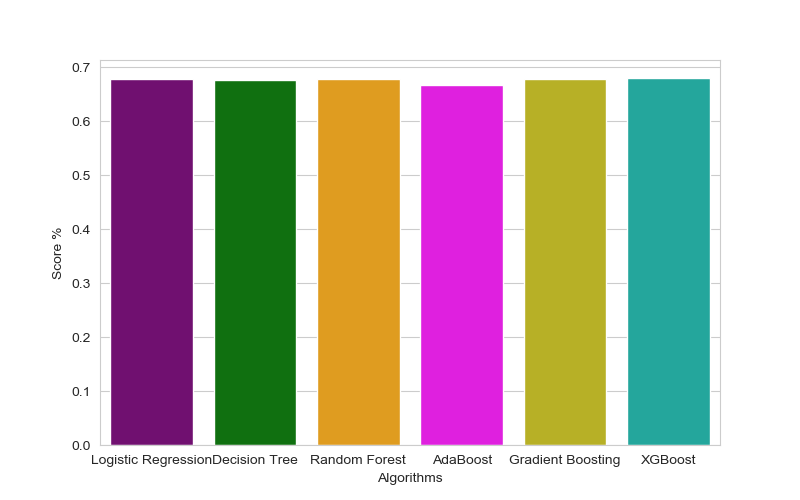

In [50]:
methods = ["Logistic Regression", "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]
score = [score1, score2, score3, score4, score5, score6 ]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.yticks(np.arange(0,10,0.1))
plt.figure(figsize=(8,5))
plt.ylabel("Score %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=score, palette=colors)
plt.show()

In [51]:
df_output

,remaining_min,remaining_sec,distance_of_shot,shot_id_number,home/away_0,home/away_1,shot_basics_Goal Area,shot_basics_Goal Line,shot_basics_Mid Range,shot_basics_Others,shot_basics_Penalty Spot,area_of_shot_Center(C),area_of_shot_Left Side Center(LC),area_of_shot_Left Side(L),area_of_shot_Mid Ground(MG),area_of_shot_Right Side Center(RC),area_of_shot_Right Side(R),game_season_1999-00,game_season_2000-01,game_season_2001-02,game_season_2002-03,game_season_2003-04,game_season_2004-05,game_season_2005-06,game_season_2006-07,game_season_2007-08,game_season_2008-09,game_season_2009-10,game_season_2010-11,game_season_2011-12,game_season_2012-13,game_season_others,range_of_shot_16-24 ft.,range_of_shot_24+ ft.,range_of_shot_8-16 ft.,range_of_shot_Back Court Shot,range_of_shot_Less Than 8 ft.,"lat/lng_29.444994, -98.524120","lat/lng_29.740325, -95.365762","lat/lng_32.757824, -96.786653","lat/lng_33.552026, -112.071667","lat/lng_34.189593, -118.471724","lat/lng_35.103812, -89.964007","lat/lng_37.754130, -122.437947","lat/lng_38.567296, -121.456638","lat/lng_39.739968, -104.954013","lat/lng_40.774891, -111.930790","lat/lng_42.330507, -71.074655","lat/lng_42.982923, -71.446094","lat/lng_45.539131, -122.651648","lat/lng_46.667324, -94.419250","lat/lng_47.633181, -122.308343",lat/lng_others,knockout_match_0.0,knockout_match_1.0,power_of_shot_1.0,power_of_shot_2.0,power_of_shot_3.0,power_of_shot_4.0,power_of_shot_others,Pos-x,Pos-y,Pos-z
0,10.0,27.0,38.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0.850879,-0.223286,-0.47555
7,8.0,5.0,22.0,8.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,-0.520098,0.146371,0.841471
16,0.0,1.0,20.0,17.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
19,10.0,46.0,20.0,20.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
21,9.0,4.0,38.0,22.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,-0.107775,-0.451134,0.885925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30681,0.0,2.0,46.0,30682.0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,-0.640145,-0.161963,0.750987
30682,11.0,30.0,28.0,30683.0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,-1,-1,-1
30686,5.0,37.0,29.0,30687.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,-0.303989,0.908131,-0.287903
30687,3.0,18.0,30.0,30688.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,-0.575113,0.337715,0.745113


In [52]:
shot_id = df_output[['shot_id_number']]

In [53]:
new_index = np.arange(0,6268)

shot_id['index_values'] = new_index
shot_id.set_index('index_values', inplace= True)

In [54]:
shot_id

,shot_id_number
index_values,
0,1.0
1,8.0
2,17.0
3,20.0
4,22.0
...,...
6263,30682.0
6264,30683.0
6265,30687.0


In [55]:
df_output = scaler.transform(df_output)

In [56]:
#Predicting Output
y_output_prediction =  xgb_model.predict_proba(df_output)[:,1]
print(y_output_prediction)

[0.16911411 0.45618692 0.44543466 ... 0.17336379 0.35011208 0.17536871]


In [57]:
result = pd.DataFrame(data=y_output_prediction)

In [58]:
result

,0
0,0.169114
1,0.456187
2,0.445435
3,0.432512
4,0.237154
...,...
6263,0.144796
6264,0.194280
6265,0.173364
6266,0.350112


In [59]:
#Column addition

result['shot_id_number']= shot_id['shot_id_number']
result

,0,shot_id_number
0,0.169114,1.0
1,0.456187,8.0
2,0.445435,17.0
3,0.432512,20.0
4,0.237154,22.0
...,...,...
6263,0.144796,30682.0
6264,0.194280,30683.0
6265,0.173364,30687.0
6266,0.350112,30688.0


In [60]:
result.columns = ['is_goal', 'shot_id_number']
result.shot_id_number = result.shot_id_number.astype(int)
result = result[['shot_id_number', 'is_goal']]
result['is_goal'] = round((result['is_goal'].astype(float)),4) 
result

,shot_id_number,is_goal
0,1,0.1691
1,8,0.4562
2,17,0.4454
3,20,0.4325
4,22,0.2372
...,...,...
6263,30682,0.1448
6264,30683,0.1943
6265,30687,0.1734
6266,30688,0.3501


In [61]:
result.to_csv("prediction.csv", index=False)

In [62]:
from IPython.display import HTML

def download_link(title="Download CSV", filename='data.csv'):
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title, filename=filename)
    return HTML(html)

download_link(filename='prediction.csv')